# **Conectamos Kaggle con Colab**

In [ ]:
# Este notebook tiene como finalidad entender el dataset BraTS2020

In [ ]:
# dataset
# https://www.kaggle.com/awsaf49/brats20-dataset-training-validation

In [ ]:
!pip install kaggle

In [ ]:
#Cargar kaggle.json
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Copy API command
!kaggle datasets download -d awsaf49/brats20-dataset-training-validation

100% 4.16G/4.16G [00:54<00:00, 51.2MB/s]
100% 4.16G/4.16G [00:54<00:00, 81.8MB/s]


In [ ]:
!ls

brats20-dataset-training-validation.zip  kaggle.json  sample_data


In [ ]:
# Conectar a Drive
!cp -r "/content/brats20-dataset-training-validation.zip" "/content/drive/MyDrive/Electivos/IAA/Proyecto/code/dataset/BraTS-2020"

In [ ]:
# Descomprimimos
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Electivos/IAA/Proyecto/code/dataset/BraTS-2020/brats20-dataset-training-validation.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/Electivos/IAA/Proyecto/code/dataset/BraTS-2020')
zip_ref.close()

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import glob
import nibabel as nib
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

# **1.Secuencias**

## **1.1.Visualización de imágenes del cerebro**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
os.chdir("/content/drive/MyDrive/Electivos/IAA/Proyecto/code/dataset/BraTS-2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001")

In [ ]:
!ls

drive  sample_data


In [7]:
# Escogemos la secuencia FLAIR
# Nota: Lo conveniente es usar las 4 secuencias proporcionadas y formar una sola imagen
image_path_flair = 'BraTS20_Training_001_flair.nii'
image_path_t1ce = 'BraTS20_Training_001_t1ce.nii'
image_path_t1 = 'BraTS20_Training_001_t1.nii'
image_path_t2 = 'BraTS20_Training_001_t2.nii'

image_obj_flair = nib.load(image_path_flair)
image_obj_t1ce = nib.load(image_path_t1ce)
image_obj_t1 = nib.load(image_path_t1)
image_obj_t2 = nib.load(image_path_t2)

type(image_obj_flair)

nibabel.nifti1.Nifti1Image

In [8]:
image_data_flair = image_obj_flair.get_fdata()
image_data_t1ce = image_obj_t1ce.get_fdata()
image_data_t1 = image_obj_t1.get_fdata()
image_data_t2 = image_obj_t2.get_fdata()

type(image_data_flair)

numpy.memmap

In [9]:
print("alto, ancho, profundidad")
print("flair:",image_data_flair.shape)
print("t1ce:",image_data_t1ce.shape)
print("t1:",image_data_t1.shape)
print("t2:",image_data_t2.shape)

alto, ancho, profundidad
flair: (240, 240, 155)
t1ce: (240, 240, 155)
t1: (240, 240, 155)
t2: (240, 240, 155)


(240, 240, 155, 4)
(240, 240, 4)


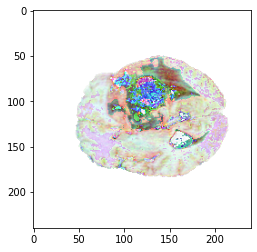

In [10]:
# Juntamos las 4 secuencias separadas en una solo arreglo
total_BraTS20_Training_001 = np.stack((image_data_flair,
                  image_data_t1ce,
                  image_data_t1,
                  image_data_t2),
                  axis = 3)
plt.imshow(total_BraTS20_Training_001[:,:,70,:].astype('uint8'), cmap='gray') # uint8 para que nos deje graficar correctamente
print(total_BraTS20_Training_001.shape)
print(total_BraTS20_Training_001[:,:,75,:].shape)

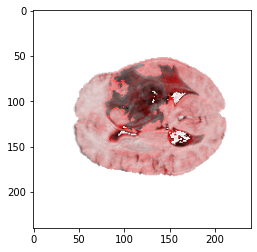

In [ ]:
# A modo de prueba:
# Solo nos quedamos con las secuencias flair(indice 0) y t2(indice 3)
total_BraTS20_Training_001[:,:,:,1] = 0
total_BraTS20_Training_001[:,:,:,2] = 0
plt.imshow(total_BraTS20_Training_001[:,:,75,:].astype('uint8'), cmap='gray') # uint8 para que nos deje graficar correctamente

In [ ]:
# Corrigiendo con unit8
print(total_BraTS20_Training_001[:,:,75,0].astype('uint8').dtype)
print(np.max(total_BraTS20_Training_001[:,:,75,0].astype('uint8')))
print(np.min(total_BraTS20_Training_001[:,:,75,0].astype('uint8')))

uint8
255
0


In [ ]:
# Comenzamos con el corte 65 de profundidad
i=65

profundidad 67


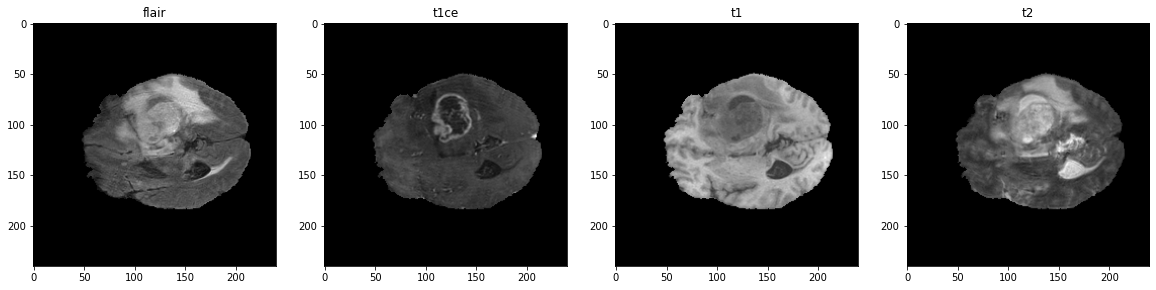

In [ ]:
# Visualizamos las distintas secuencias
print(f"profundidad {i}")
plt.figure(1,figsize=(20,24))
plt.subplot(1, 4, 1)
plt.imshow(total_BraTS20_Training_001[:,:,i,0],cmap = 'gray')
plt.title('flair')

plt.subplot(1, 4, 2)
plt.imshow(total_BraTS20_Training_001[:,:,i,1],cmap='gray')
plt.title('t1ce')

plt.subplot(1, 4, 3)
plt.imshow(total_BraTS20_Training_001[:,:,i,2],cmap='gray')
plt.title('t1')

plt.subplot(1, 4, 4)
plt.imshow(total_BraTS20_Training_001[:,:,i,3],cmap='gray')
plt.title('t2')
plt.show()
i +=1 

Dibujamos Capa 125 de la imagen


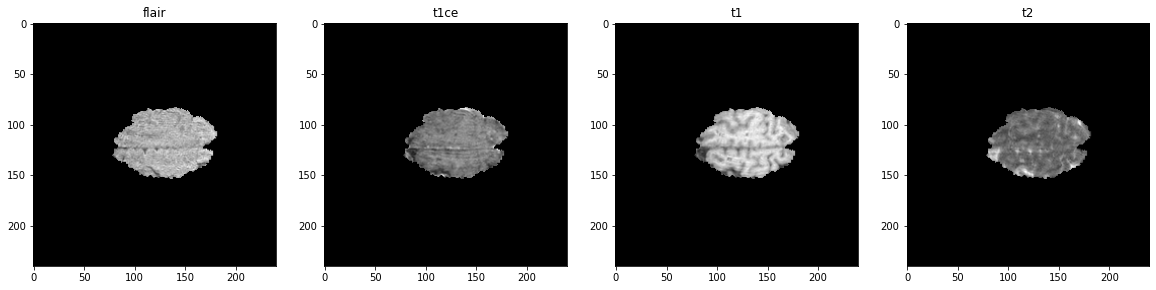

In [ ]:
# Seleccionamos un numero de capa aleatoria
maxval = total_BraTS20_Training_001.shape[2]-1
i = np.random.randint(0, maxval)
print(f"Dibujamos Capa {i} de la imagen")

plt.figure(1,figsize=(20,24))
plt.subplot(1, 4, 1)
plt.imshow(total_BraTS20_Training_001[:,:,i,0],cmap = 'gray')
plt.title('flair')

plt.subplot(1, 4, 2)
plt.imshow(total_BraTS20_Training_001[:,:,i,1],cmap='gray')
plt.title('t1ce')

plt.subplot(1, 4, 3)
plt.imshow(total_BraTS20_Training_001[:,:,i,2],cmap='gray')
plt.title('t1')

plt.subplot(1, 4, 4)
plt.imshow(total_BraTS20_Training_001[:,:,i,3],cmap='gray')
plt.title('t2')
plt.show()

## **1.2.Exploración interactiva de las imagenes del cerebro**

In [11]:
def explore_3dimage(layer):
  plt.figure(1,figsize=(20,24))
  #plt.title('Explorar Capas de IRM del cerebro para FLAIR', fontsize=20)
  plt.subplot(1, 4, 1)
  plt.imshow(total_BraTS20_Training_001[:,:,layer,0],cmap = 'gray')
  plt.title('flair')

  plt.subplot(1, 4, 2)
  plt.imshow(total_BraTS20_Training_001[:,:,layer,1],cmap='gray')
  plt.title('t1ce')

  plt.subplot(1, 4, 3)
  plt.imshow(total_BraTS20_Training_001[:,:,layer,2],cmap='gray')
  plt.title('t1')

  plt.subplot(1, 4, 4)
  plt.imshow(total_BraTS20_Training_001[:,:,layer,3],cmap='gray')
  plt.title('t2')
  plt.axis('off')
  return layer
# Ejecutamos la función ipywidgets interact () para explorar los datos
interact(explore_3dimage, layer=(0, total_BraTS20_Training_001.shape[2] - 1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

# **2.Máscaras**

## **2.1.Visualización de imágenes de las máscaras**

In [ ]:
label_mask = 'BraTS20_Training_001_seg.nii'
label_obj = nib.load(label_mask)
type(label_obj)

nibabel.nifti1.Nifti1Image

In [ ]:
# Extraemos etiquetas de las mascaras
label_array = label_obj.get_fdata()
type(label_array)

numpy.memmap

In [ ]:
label_array.shape

(240, 240, 155)

In [ ]:
height, width, depth = label_array.shape
print(f"Dimensiones de la matriz de datos de las mascaras: {height}, width: {width}, depth: {depth}")
print(f'Con los valores únicos: {np.unique(label_array)}')
print("""Correspondiente a las siguientes categorías de etiquetas:
0: para tumor completo(WT)
1: para el núcleo del tumor necrótico y no realzado(TC)
2: para edema peritumoral
4: para tumor realzado con GD (ET)""") # valores sacados de la documentación del dataset

Dimensiones de la matriz de datos de las mascaras: 240, width: 240, depth: 155
Con los valores únicos: [0. 1. 2. 4.]
Correspondiente a las siguientes categorías de etiquetas:
0: para tumor completo(WT)
1: para el núcleo del tumor necrótico y no realzado(TC)
2: para edema peritumoral
4: para tumor realzado con GD (ET)


In [ ]:
i = 65

profundidad 50
(240, 240)


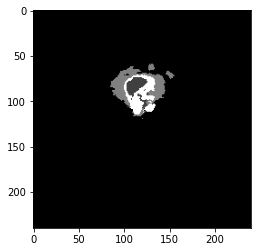

In [ ]:
print(f"profundidad {50}")
plt.imshow(label_array[:,:,50],cmap = "gray")
i +=1
print(label_array[:,:,50].shape)

In [ ]:
label_array[:,:,65]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Nota: los valores de las máscaras se muestran de 0 a 4 , apesar de esto al graficarlo en el imshow podemos
# ver valores cercanos al blanco, esto es debido a que el imshwow normaliza la matriz antes de graficarlo.

## **2.2.Visualizamos las máscaras de una capa específica**

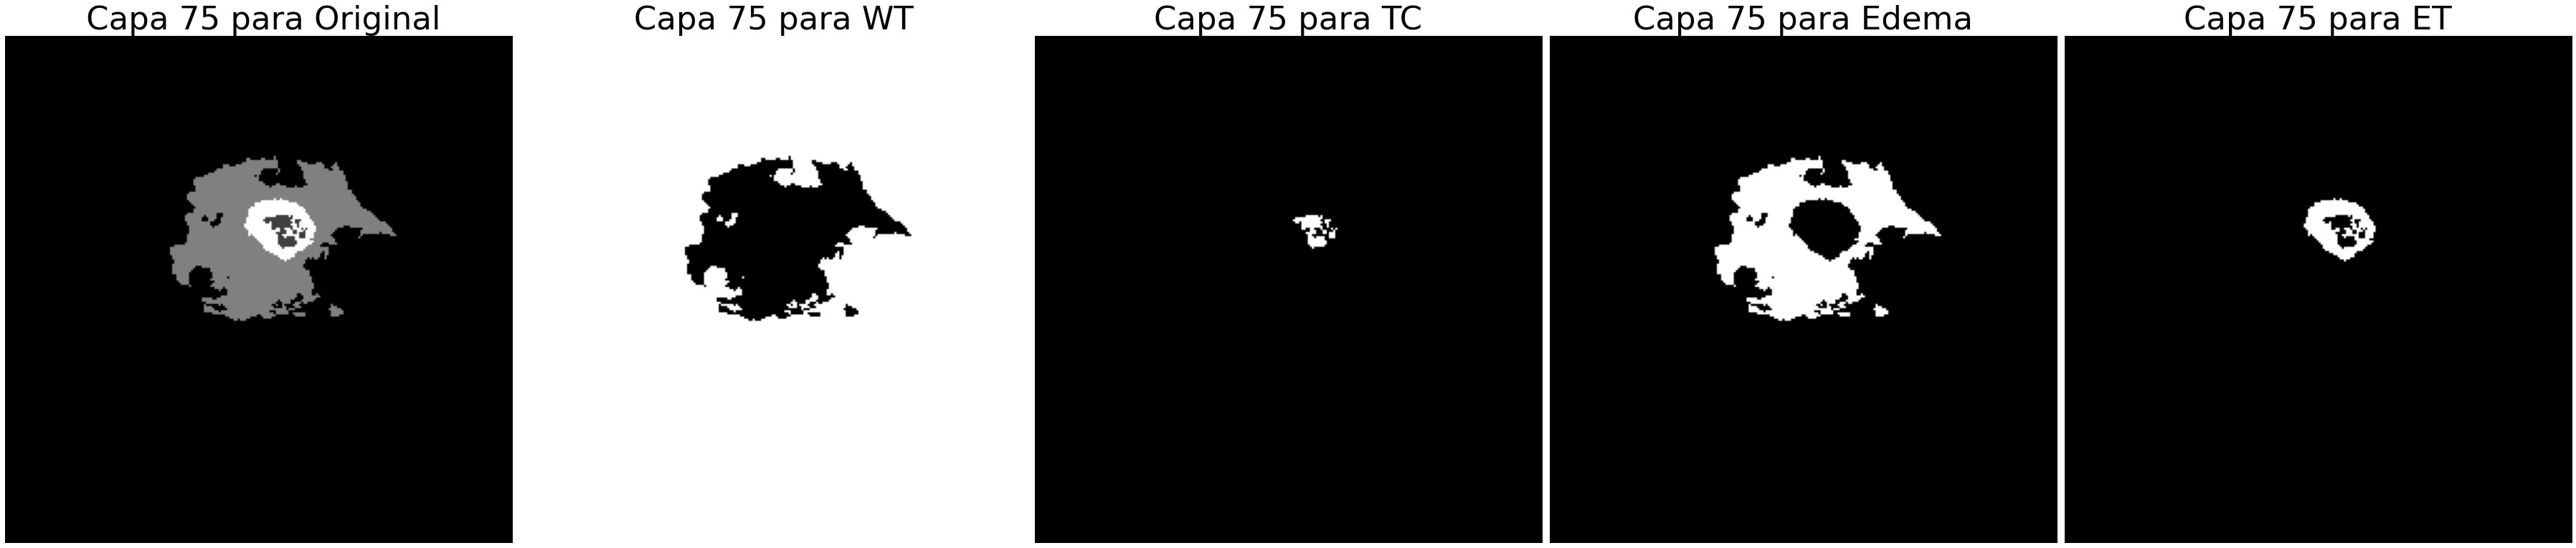

In [ ]:
# Definimos una capa para dibujar
layer = 75
# Definimos un diccionario de etiquetas de clase
classes_dict = {
'WT': 0.,
'TC': 1.,
'Edema': 2.,
'ET': 4.
}

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(50, 30))
for i in range(1,5):
  img_label_str = list(classes_dict.keys())[i-1]
  img = label_array[:,:,layer]
  mask = np.where(img == classes_dict[img_label_str], 255, 0)
  ax[0].imshow(label_array[:,:,layer],cmap = "gray")
  ax[0].set_title(f" Capa {layer} para Original",fontsize=45)
  ax[0].axis('off')
  ax[i].imshow(mask,cmap = "gray")
  ax[i].set_title(f"Capa {layer} para {img_label_str}", fontsize=45)
  ax[i].axis('off')
  plt.tight_layout()

## **2.3.Exploración interactiva de las máscaras**

In [ ]:
# Creamos valores de los botones
select_class = ToggleButtons(
options=['WT','TC', 'Edema', 'ET'],
description='Clase:',
disabled=False,
button_style='info',
)

In [ ]:
# Control deslizante de capa
select_layer = IntSlider(min=0, max=154, description='Capa:', continuous_update = False)

In [ ]:
# Definimos funcion para dibujar imagenes
def plot_image(seg_class, layer):
  print(f"Dibujamos capa {layer} label: {seg_class}")
  img_label = classes_dict[seg_class]
  mask = np.where(label_array[:,:,layer] == img_label, 255, 0)
  plt.figure(figsize=(10,5))
  plt.imshow(mask, cmap='gray')
  plt.axis('off');

In [ ]:
# Visualizacion interactiva
interactive(plot_image, seg_class=select_class, layer=select_layer)

interactive(children=(ToggleButtons(button_style='info', description='Clase:', options=('WT', 'TC', 'Edema', '…

profundidad 75


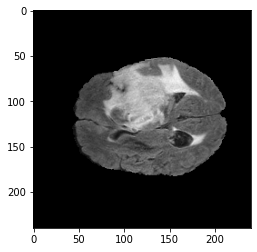

In [ ]:
# En la secuencia FLAIR
print(f"profundidad {75}")
plt.imshow(total_BraTS20_Training_001[:,:,0,75],cmap = "gray")
i +=1 

In [ ]:
# Como vemos la clase seleccionada Normal sería el tumor a segmentar tal como se nota 
# en la imagen del cerebro en la secuencia FLAIR (layer = 75)